# Entanglement Classifier Trial Notebook

### Importing Dependencies

In [18]:
import numpy as np
from sympy.physics.quantum import TensorProduct

from components.system import System
from components.connection import ConnectionFactory, Connection
from components.model import Model
from components.connection_functions import DrivenCascadeFunction, EnergyExchangeFunction
from components.state_generator import generatePureState, generateMixedState, generateMixedStateUsingPure

### Setting up the system

In [19]:
reservoir_nodes=2
system_nodes=1

In [20]:
"""
Defining System setup
"""

system_state = generateMixedState()
system_node_list = [0]

if len(system_node_list) != system_nodes:
    raise Exception

system_connections = {}

system = System(
    init_quantum_state=system_state, nodes=system_node_list, connections=system_connections
)
print(system_state)

[[0.32950056 0.46990072]
 [0.46990072 0.67049944]]


### Setting up the interface

In [21]:

"""
Defining Interface setup
"""

interfaceFactory = ConnectionFactory(DrivenCascadeFunction, gamma_1=10, gamma_2=10)

### Setting up the reservoir

In [22]:
"""
Defining Reservoir setup
"""

reservoirFactory = ConnectionFactory(EnergyExchangeFunction, is_hamiltonian=True, J=1)

### Setting up the model

In [23]:
model = Model()
model.setSystem(system)
model.setReservoirConnectionFac(reservoirFactory)
model.setInterfaceConectionFac(interfaceFactory)
model.generateReservoir(reservoir_nodes, init_quantum_state=0, connection_rate=1)
model.generateInterface(connection_rate=0.5)
model.setRunDuration(10)
model.setRunResolution(0.001)


### Running the model

In [24]:
state1 = np.array([[0.5, 0.5], [0.5, 0.5]])
print(np.trace(np.matmul(state1, state1)))
state2 = np.array([[0.5, 0], [0, 0.5]])
print(np.trace(np.matmul(state2, state2)))

1.0
0.5


In [25]:
state1

array([[0.5, 0.5],
       [0.5, 0.5]])

In [26]:
state2

array([[0.5, 0. ],
       [0. , 0.5]])

In [27]:
model.system.init_quantum_state = state1

In [28]:
model.run()

In [29]:
log1 = model.modelLog

In [30]:
model.system.init_quantum_state = state2
model.run()
log2 = model.modelLog

### Plotting results

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


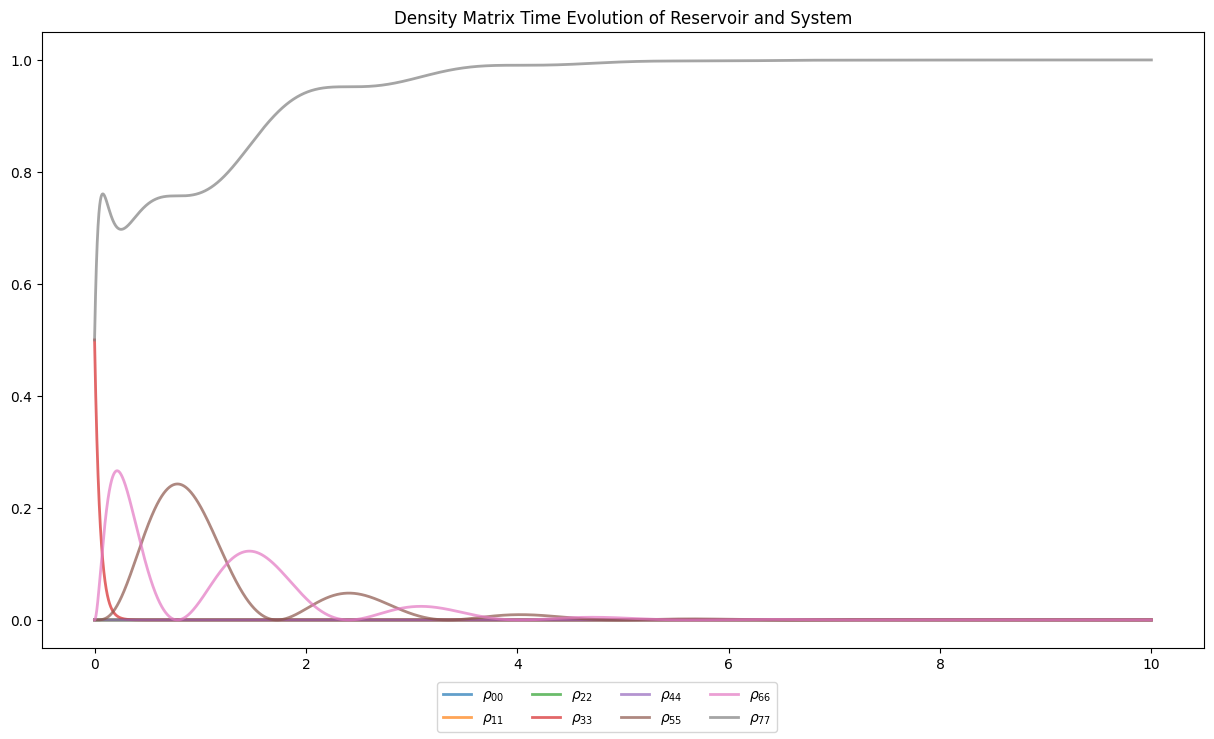

In [31]:
log1.plotResAndSys()

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


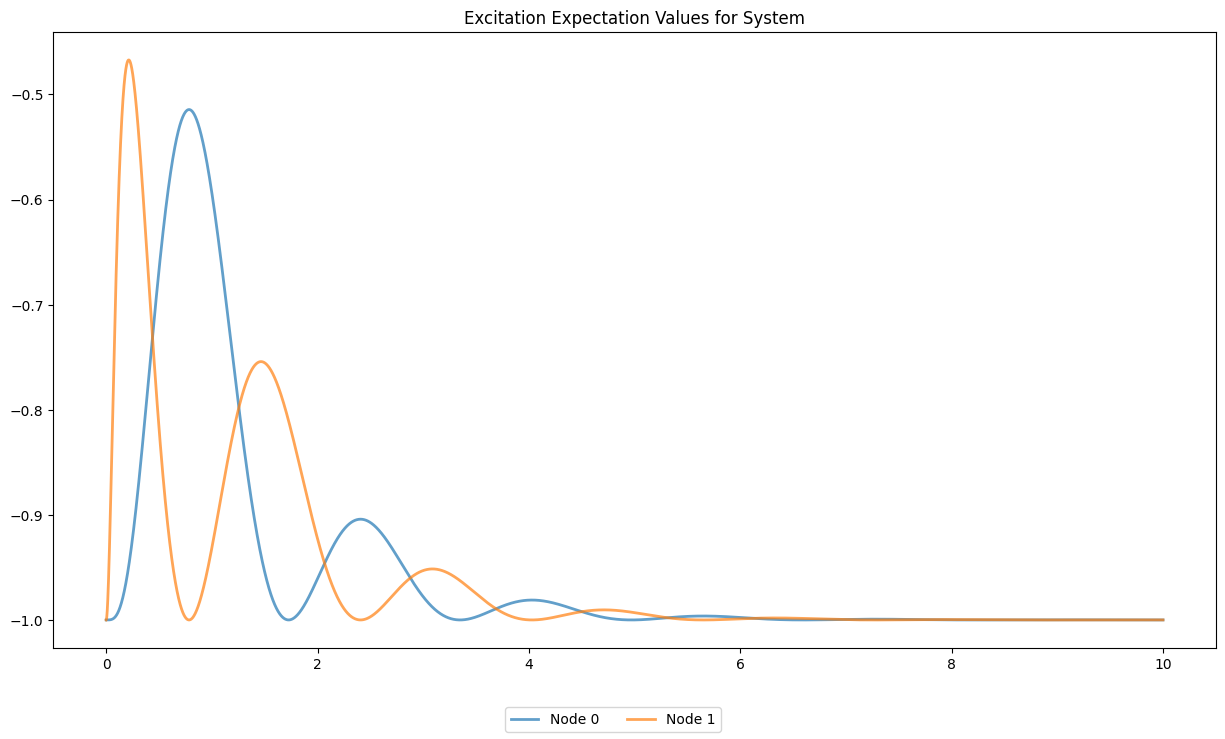

In [32]:
log1.plotExcite()

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


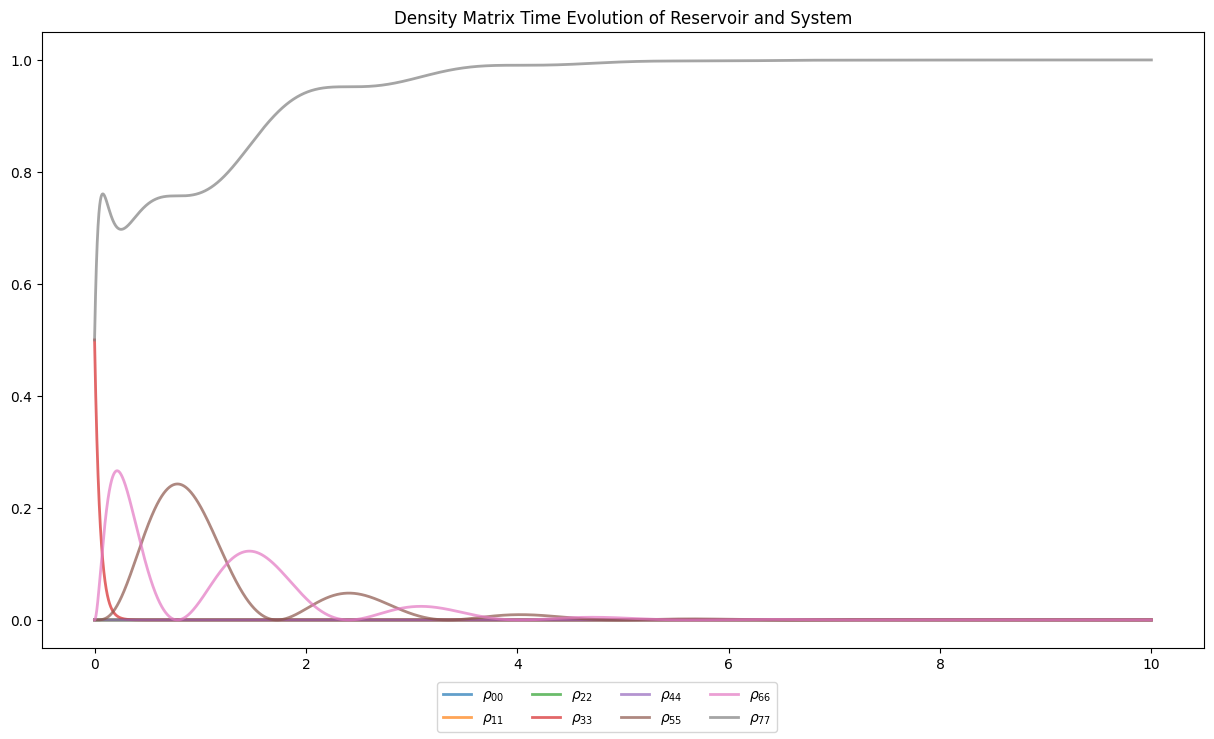

In [33]:
log2.plotResAndSys()

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


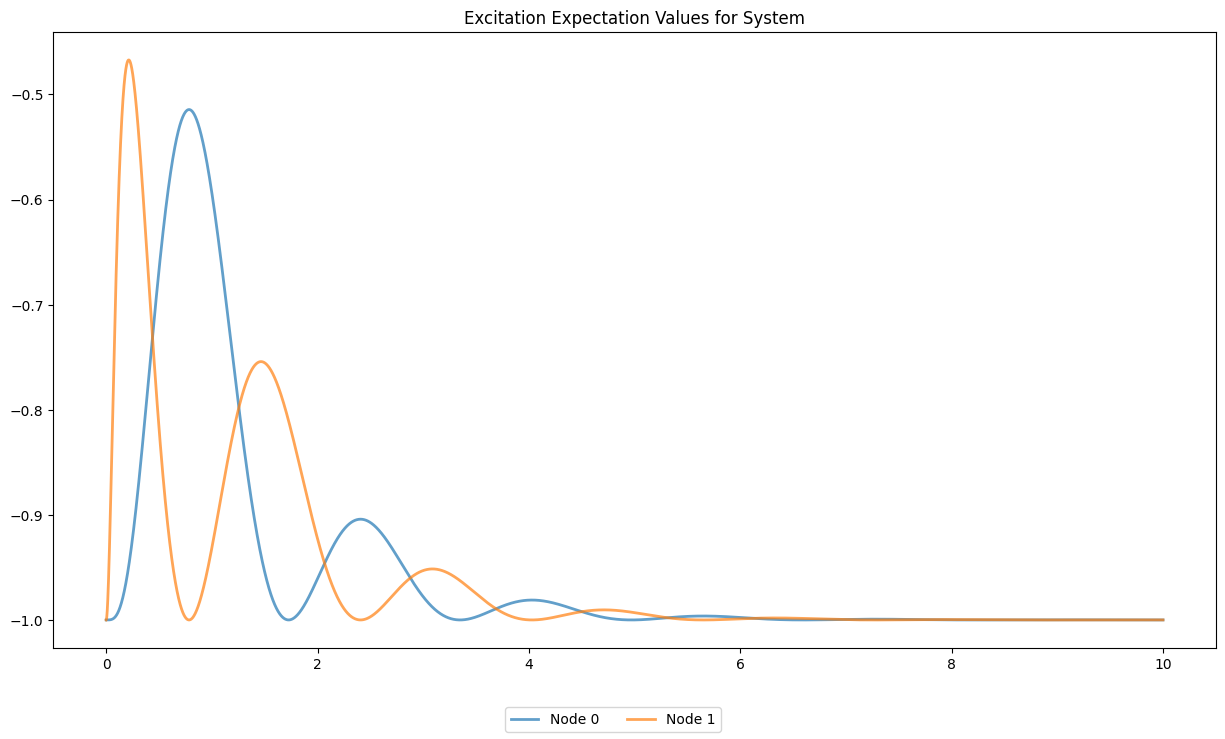

In [34]:
log2.plotExcite()